In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv('student_performance_dataset.csv')
df

,Study_hours,Attendance_percent,Sleep_hours,Game_hours,Anxiety_score,Exam_score
0,6,57,5,4,3,42.0
1,19,76,8,0,6,144.0
2,14,58,9,3,7,98.0
3,10,86,4,4,3,75.0
4,7,82,7,9,7,60.0
...,...,...,...,...,...,...
145,12,87,8,6,1,99.0
146,8,94,9,8,4,81.0
147,2,57,4,3,8,44.0
148,6,76,8,3,5,70.0


In [4]:
df.isnull().sum()

Study_hours           0
Attendance_percent    0
Sleep_hours           0
Game_hours            0
Anxiety_score         0
Exam_score            0
dtype: int64

In [5]:
df.isna().sum()

Study_hours           0
Attendance_percent    0
Sleep_hours           0
Game_hours            0
Anxiety_score         0
Exam_score            0
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

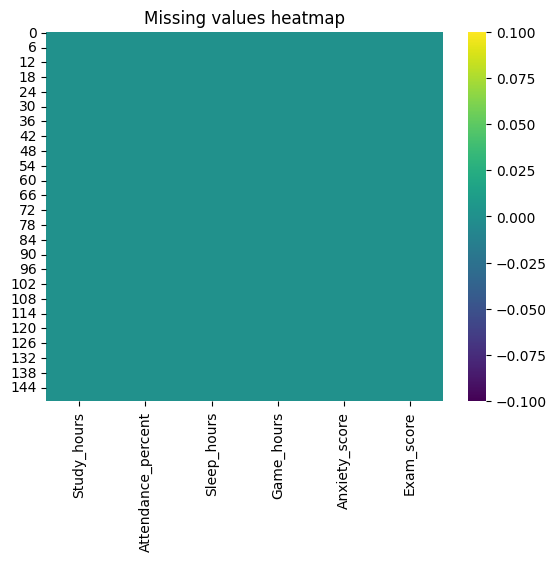

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cmap='viridis')
plt.title('Missing values heatmap')

In [8]:
X = df.drop(columns=['Exam_score'])
y=df['Exam_score']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
mod=LinearRegression()
mod.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = mod.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse={mse}; r2={r2}')

mse=113.82563702487873; r2=0.8359640532470092


Text(0.5, 1.0, 'Actual vs Predicted Exam Scores')

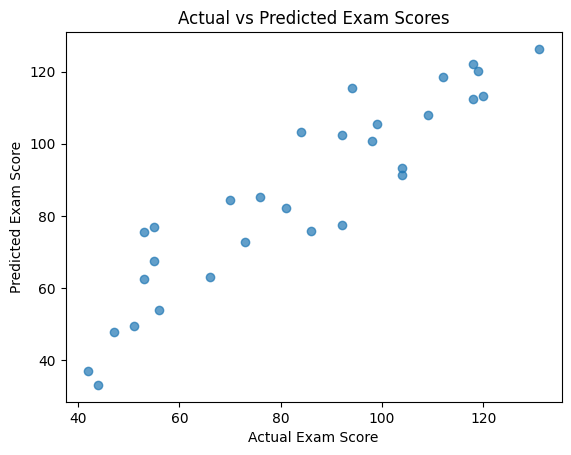

In [14]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Exam_score']))
y=df['Exam_score']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [17]:
mod = LinearRegression()
mod.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = mod.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse={mse}; r2={r2}")

mse=113.82563702487867; r2=0.8359640532470092
